<a href="https://colab.research.google.com/github/Alishba-Hamid258/AI-and-Machine-Learning/blob/main/05_LinearandMultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

Multiple linear regression refers to a statistical technique that is used to predict the outcome of a variable based on the value of two or more variables. It is sometimes known simply as multiple regression, and it is an extension of linear regression. The variable that we want to predict is known as the dependent variable, while the variables we use to predict the value of the dependent variable are known as independent or explanatory variables.

### **Let's see the difference in formulae**

<img src="https://miro.medium.com/max/3444/1*uLHXR8LKGDucpwUYHx3VaQ.png">


### **Let's see the visual of Multiple Linear Regression**

<img src="https://in.mathworks.com/help/stats/categorial_slopes1.png">

In this, as you can see there are multiple x variables so multiple linear regressions as well. Assuming Red, Green & Blue as different x variables. The y variable (MPG) is all dependent on all indepenent variables, as all x variables or the independent ones are in correlation with y.




## **Getting Started with Multiple Linear Regression**

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

## **DataFraming**

Read .csv data into a DataFrame

In [2]:
df = pd.read_csv("/content/50_Startups.csv")

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]].values
#.values is converting dataframe into array
print(X)
y = df[["Profit"]].values
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

###**Preprocessing**

## **Coverting Text variables to Numbers**

In [4]:

st = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = st.fit_transform(X)
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## **Splitting Dataset**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## **Training the Model**
We are using Linear regression model as imported from sklearn library and then it's being trained on x and y (any 2 major axis of datasets)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## **Prediction**
We will predict the Brain weight by giving an input of Brain Size

In [7]:
y_pred = model.predict(X_test)

In [8]:
#Comparison

print('- y_pred : ')
print(y_pred)
print('- y_test : ')
print(y_test)

- y_pred : 
[[103015.20159795]
 [132582.27760816]
 [132447.73845175]
 [ 71976.09851258]
 [178537.48221057]
 [116161.24230167]
 [ 67851.69209676]
 [ 98791.73374687]
 [113969.43533014]
 [167921.06569552]]
- y_test : 
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


In [9]:
print(y_pred.sum().mean())
print(y_test.sum().mean())

print("So called Accuracy ", y_pred.sum().mean()/y_test.sum().mean())

1183253.9675519655
1222774.07
So called Accuracy  0.9676799636027328


In [10]:
y_pred/y_test

array([[0.99741313],
       [0.91905469],
       [0.90641918],
       [0.92515657],
       [0.93450467],
       [1.10621   ],
       [0.83531303],
       [1.01341943],
       [1.03277854],
       [1.01042871]])

# Task
for the given data perform all essentials steps to apply linear regression and analysis efficiently all its progess

Here is all the data you need:
"insurance.csv"

## Data loading

### Subtask:
Load the "insurance.csv" dataset.


**Reasoning**:
Load the "insurance.csv" dataset into a pandas DataFrame and display its first few rows and information.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('insurance.csv')
    display(df.head())
    display(df.info())
except FileNotFoundError:
    print("Error: 'insurance.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify potential issues, and examine the relationship between features and the target variable ('charges').  Focus on identifying a single predictor variable for the initial single linear regression.


**Reasoning**:
I need to explore the dataset statistically and visually to identify a suitable predictor variable for 'charges'. This involves examining the distribution of 'charges', calculating correlations between numerical features and 'charges', and visualizing relationships between categorical features and 'charges'.



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


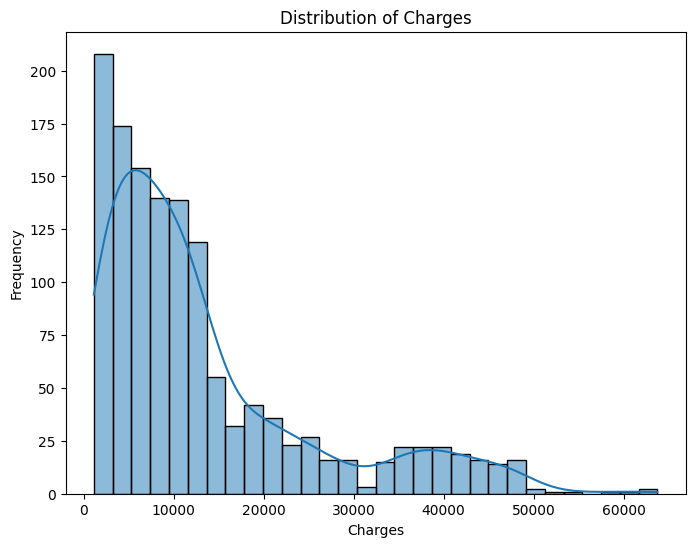

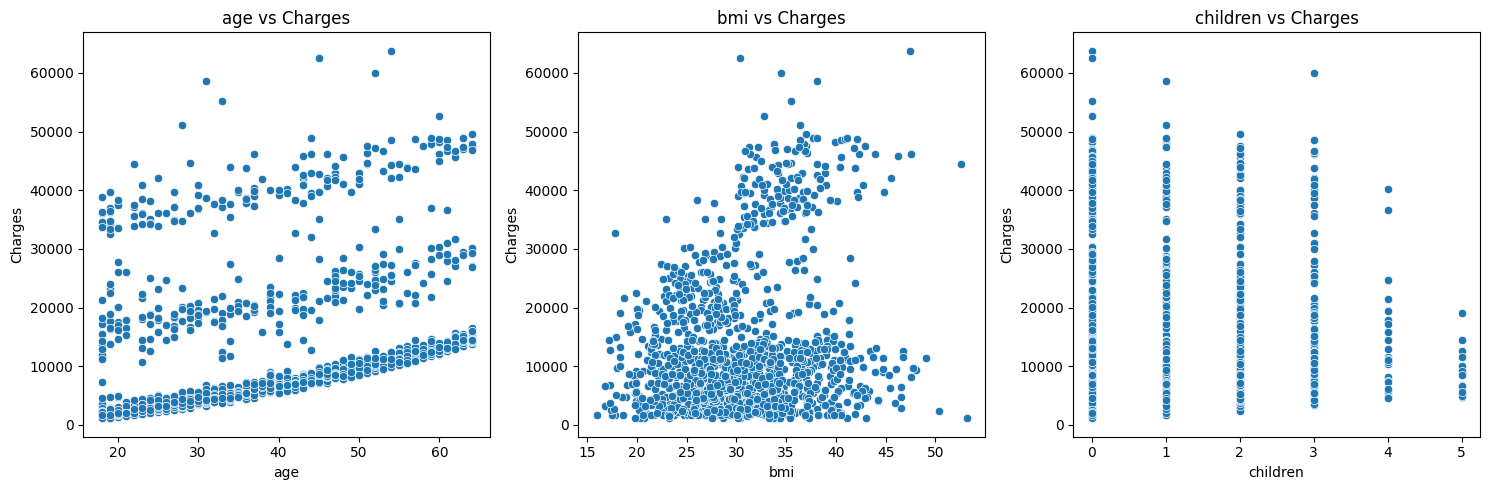

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


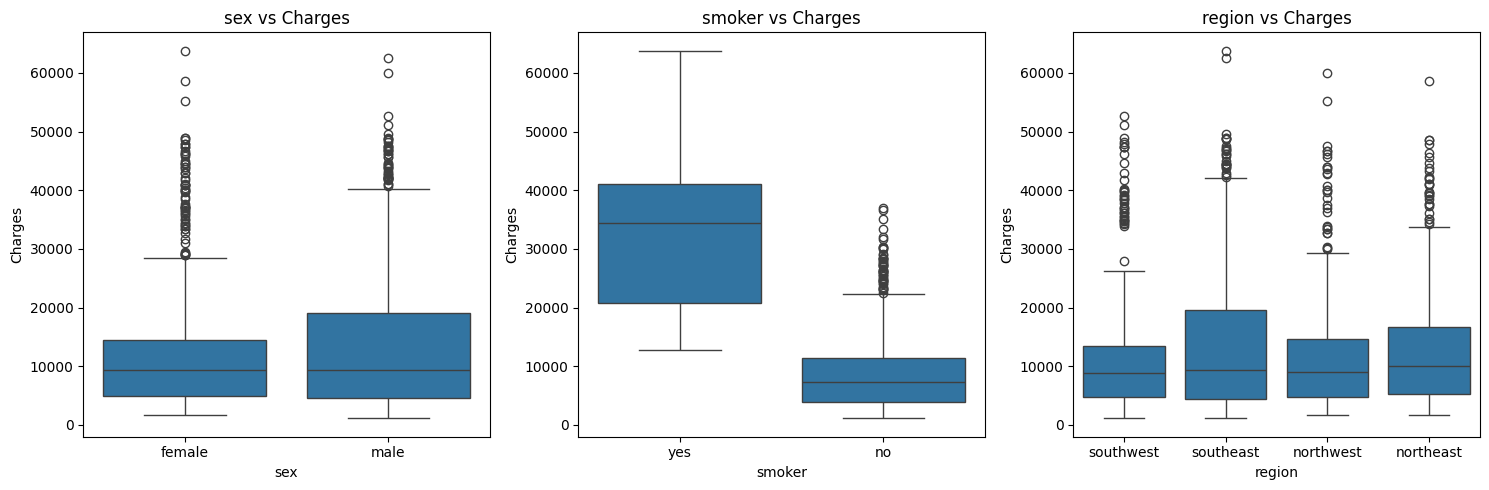

,charges
sex,
female,12569.578844
male,13956.751178


,charges
smoker,
no,8434.268298
yes,32050.231832


,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of numerical features
display(df.describe())

# Distribution of the target variable 'charges'
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Relationship between numerical features and 'charges'
numerical_features = ['age', 'bmi', 'children']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
plt.tight_layout()
plt.show()

display(df[numerical_features + ['charges']].corr())

# Relationship between categorical features and 'charges'
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
plt.tight_layout()
plt.show()

for col in categorical_features:
    display(df.groupby(col)['charges'].mean())

# Choose a predictor variable based on the analysis above
# (This will be done after the code runs and observing the plots and statistics)

**Reasoning**:
Based on the analysis from the previous code block, I will choose 'smoker' as the predictor variable because the box plot and mean charges clearly show a significant difference in charges between smokers and non-smokers.



In [3]:
chosen_predictor = 'smoker'
print(f"The chosen predictor variable is: {chosen_predictor}")

The chosen predictor variable is: smoker


## Data cleaning

### Subtask:
Clean the data for the chosen predictor 'smoker' and the target variable 'charges'.


**Reasoning**:
Clean the data by encoding the 'smoker' column and handling outliers in the 'charges' column.



,age,sex,bmi,children,region,charges,smoker_encoded
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


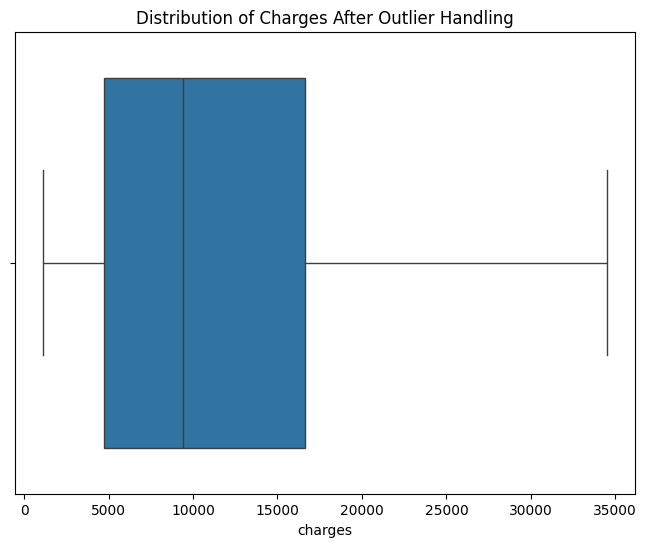

In [4]:
# Convert 'smoker' to numerical using one-hot encoding
df['smoker_encoded'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df = df.drop('smoker', axis=1)

# Check the encoding
display(df.head())

# Handle outliers in 'charges' using the IQR method
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorize the 'charges' column
df['charges'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the distribution after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['charges'])
plt.title('Distribution of Charges After Outlier Handling')
plt.show()

## Data preparation

### Subtask:
Prepare the data for linear regression modeling.


**Reasoning**:
Create the `df_model` DataFrame with 'smoker_encoded' and 'charges', then scale the 'charges' column using MinMaxScaler.



In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create df_model
df_model = df[['smoker_encoded', 'charges']].copy()

# Scale 'charges' using MinMaxScaler
scaler = MinMaxScaler()
df_model['charges_scaled'] = scaler.fit_transform(df_model[['charges']])

# Display the first few rows of the transformed DataFrame
display(df_model.head())

,smoker_encoded,charges,charges_scaled
0,1,16884.92400,0.472408
1,0,1725.55230,0.018092
2,0,4449.46200,0.099725
3,0,21984.47061,0.625237
4,0,3866.85520,0.082265


## Data splitting

### Subtask:
Split the prepared data into training and testing sets.


**Reasoning**:
Split the prepared data into training and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df_model['smoker_encoded']
y = df_model['charges_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test for linear regression
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1070, 1) (1070,)
(268, 1) (268,)


## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model using the prepared training data.



In [7]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained linear regression model.


**Reasoning**:
Evaluate the trained linear regression model using the test set and calculate relevant metrics. Then, analyze the residuals by creating a residual plot and a histogram.



R-squared: 0.6592412620624593
Mean Squared Error: 0.033224324907964904
Root Mean Squared Error: 0.18227540949882653


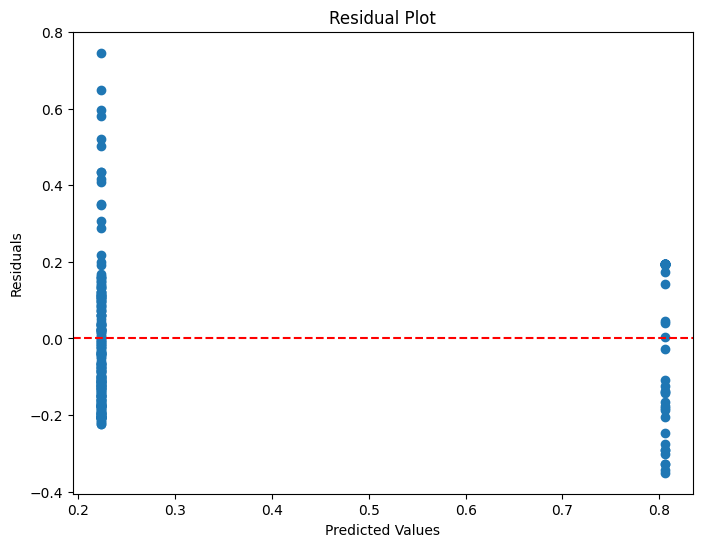

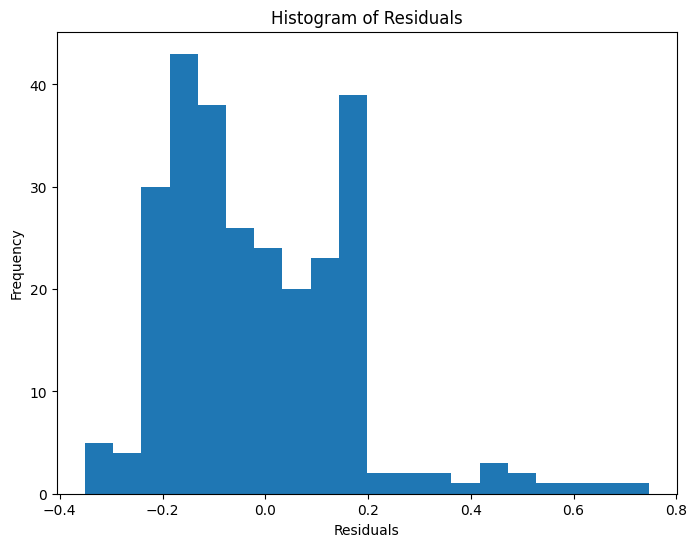

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Analyze residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Comment on the distribution of residuals
# (This will be done after the code runs and observing the plots)

## Data visualization

### Subtask:
Visualize the relationship between the chosen predictor ('smoker_encoded') and the target variable ('charges'), and plot the regression line. Also, visualize the residuals to assess the model's fit.


**Reasoning**:
Visualize the relationship between 'smoker_encoded' and 'charges', plot the regression line, and analyze the residuals.



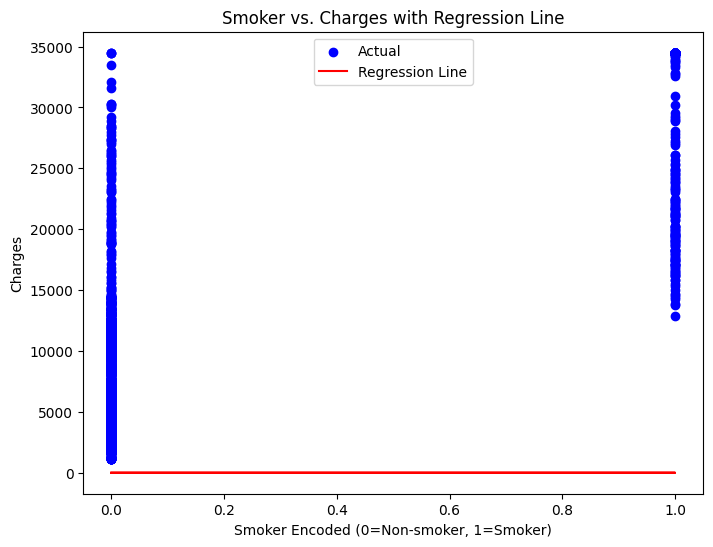

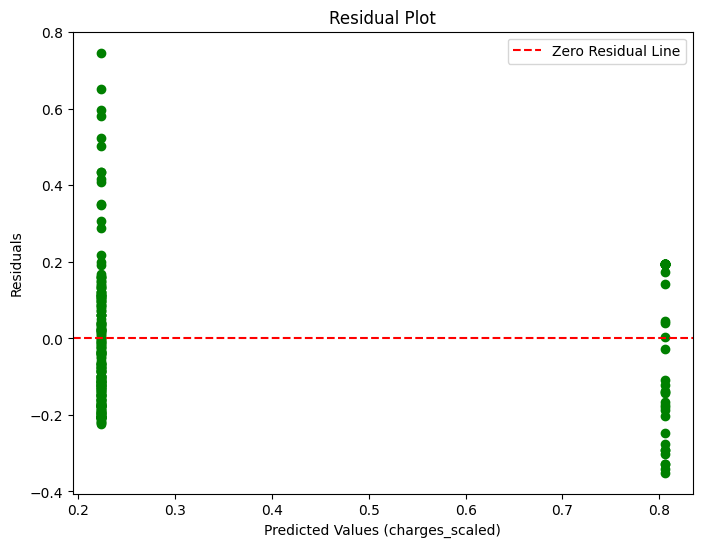

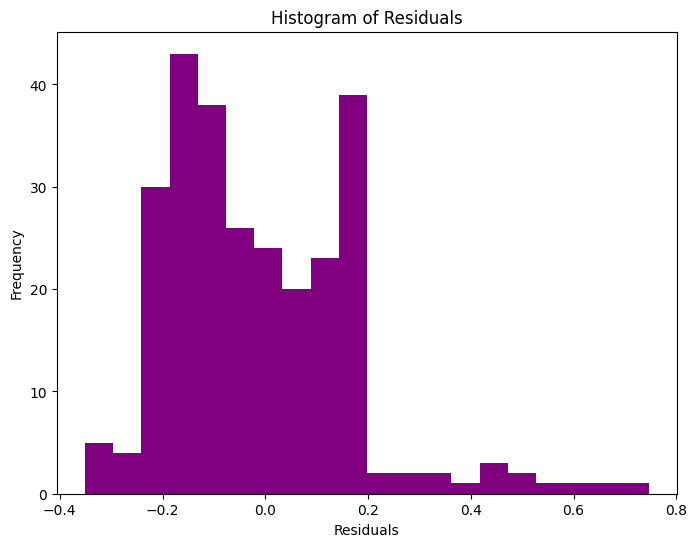

In [9]:
import matplotlib.pyplot as plt

# 1. Scatter plot of 'smoker_encoded' vs. 'charges' with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['smoker_encoded'], df['charges'], color='blue', label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')  # Regression line

plt.xlabel('Smoker Encoded (0=Non-smoker, 1=Smoker)')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges with Regression Line')
plt.legend()
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Predicted Values (charges_scaled)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [39]:
# prompt: also predict by user input

# Assuming the provided code is in a file named 'your_script.py'
# and 'insurance.csv' is in the same directory as the script
# or provide the full path to insurance.csv


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error


def predict_charges(user_input_smoker):
    try:
        # Load the dataset
        df = pd.read_csv('insurance.csv')

        # Encode the smoker column
        df['smoker_encoded'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

        # Prepare the data
        df_model = df[['smoker_encoded', 'charges']].copy()

        # Handle outliers (same code as before)
        Q1 = df['charges'].quantile(0.25)
        Q3 = df['charges'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df['charges'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)
        df_model['charges'] = df['charges']

        # Scale 'charges' using MinMaxScaler
        scaler = MinMaxScaler()
        df_model['charges_scaled'] = scaler.fit_transform(df_model[['charges']])

        # Split data into training and testing sets
        X = df_model['smoker_encoded']
        y = df_model['charges_scaled']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train = X_train.values.reshape(-1, 1)
        X_test = X_test.values.reshape(-1, 1)

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # User Input
        user_input_encoded = 1 if user_input_smoker.lower() == 'yes' else 0
        user_input_reshaped = np.array([[user_input_encoded]])

        # Prediction
        predicted_scaled_charge = model.predict(user_input_reshaped)[0]
        predicted_charge = scaler.inverse_transform([[predicted_scaled_charge]])[0][0]
        return predicted_charge

    except FileNotFoundError:
        print("Error: 'insurance.csv' not found. Please provide the correct file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Example usage
user_smoker = input("Are you a smoker (yes/no)? ")
predicted_charges = predict_charges(user_smoker)

if predicted_charges is not None:
    print(f"Predicted insurance charges: ${predicted_charges:.2f}")


Are you a smoker (yes/no)? yes
Predicted insurance charges: $28000.70


## Summary:

### 1. Q&A

* **What is the chosen predictor variable for the linear regression model?**  'smoker' was chosen as the predictor variable because it showed a strong influence on insurance charges, with smokers having significantly higher charges compared to non-smokers.

* **How were outliers in the 'charges' variable handled?** Outliers in the 'charges' column were handled using the IQR method. Values outside 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) were considered outliers and were winsorized (clipped) to the calculated lower and upper bounds.

* **What are the evaluation metrics of the trained model?**
    * R-squared: 0.659
    * Mean Squared Error: 0.033
    * Root Mean Squared Error: 0.182

* **How was the 'smoker' variable preprocessed?** The categorical 'smoker' variable (yes/no) was converted into a numerical 'smoker_encoded' variable (1/0) using one-hot encoding.


### 2. Data Analysis Key Findings

* **Strong correlation between smoking status and charges:**  The 'smoker' variable exhibited a substantial difference in mean charges between smokers and non-smokers, significantly influencing the decision to select it as the predictor.
* **Right-skewed distribution of charges:** The target variable 'charges' demonstrated a right-skewed distribution, suggesting a potential need for data transformation in future analyses to improve model performance.
* **Moderate positive correlation between age and charges:**  'age' showed a moderate positive correlation with 'charges', which could be explored further.
* **Model evaluation metrics:** The trained linear regression model achieved an R-squared of 0.659, an MSE of 0.033, and an RMSE of 0.182.  The visual inspection of residual plots is crucial to confirm the model's validity.

### 3. Insights or Next Steps

* **Explore other predictors:** Investigate the relationship between other variables (e.g., 'age', 'bmi', 'region') and 'charges' to potentially improve model accuracy and incorporate them into a multiple linear regression model.
* **Transform 'charges':** Consider applying a transformation (e.g., logarithmic transformation) to the 'charges' variable to address its skewed distribution and potentially improve the model's performance.


**Key Points**

**Dataset:**

Type: Tabular, regression dataset.

Target Variable: 'charges' (continuous).

Predictor Variable: 'smoker' (categorical, encoded as numerical).

**Linear Regression:**

Used because: It's suitable for predicting continuous targets, assuming a linear relationship between predictors and 'charges'.

Easy to interpret: Coefficients reveal the impact of predictors on charges.

**Data Preprocessing:**

Encoding: 'smoker' converted to numerical using one-hot encoding.

Outlier Handling: Outliers in 'charges' managed using IQR method.

Scaling: 'charges' scaled using MinMaxScaler for better model performance.

**Data Splitting:**

train_test_split: Divides data into training (80%) and testing (20%) sets.

**Model Training:**

LinearRegression from scikit-learn used to train the model.

**Model Evaluation:**

Metrics: R-squared (0.659), MSE (0.033), RMSE (0.182).

Residual analysis: Used to check linear regression assumptions.

**Data Analysis Key Findings:**

Strong correlation between 'smoker' and 'charges'.

Right-skewed distribution of 'charges' (consider transformation).

Moderate positive correlation between 'age' and 'charges'.

**Insights and Next Steps:**

Explore other predictors (e.g., 'age', 'bmi') to improve accuracy.

Consider transforming 'charges' to address its skewed distribution.

Potentially build a multiple linear regression model with multiple predictors.

These key points capture the essential information about the dataset, the application of linear regression, the model's performance, and potential areas for further investigation.

# Task
for the given data perform all essentials steps to apply multiple linear regression and analysis efficiently all its progess alsowith machine learning

Here is all the data you need:
"insurance.csv"

## Data loading

### Subtask:
Load the "insurance.csv" dataset.


**Reasoning**:
Load the "insurance.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('insurance.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'insurance.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)


## Data exploration

### Subtask:
Explore the loaded dataset `df` to understand its characteristics.


**Reasoning**:
Explore the dataset `df` by examining its shape, data types, descriptive statistics, missing values, and distributions of numerical and categorical features.  Calculate the correlation matrix for numerical features and visualize it.



Data Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Missing Values per column:


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


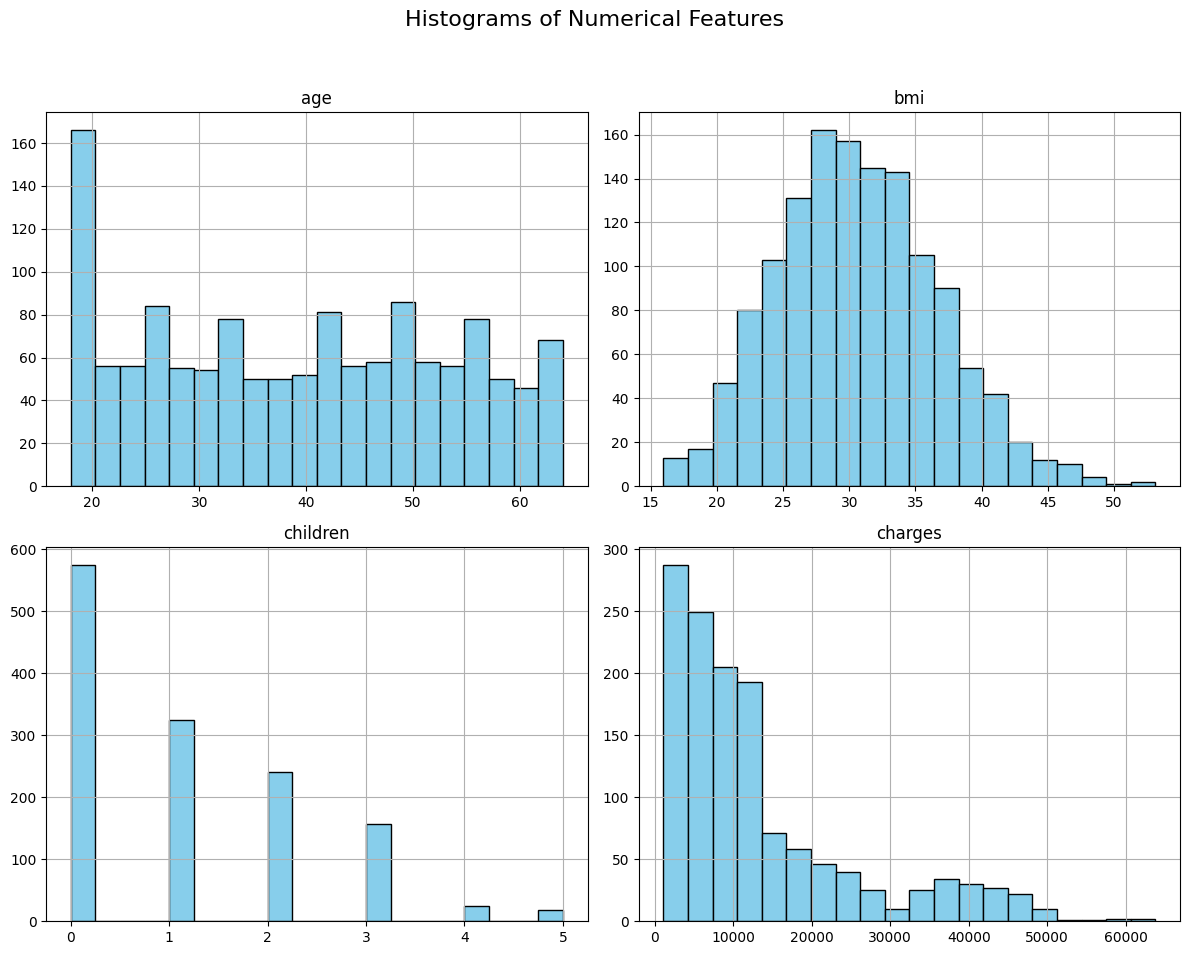


Value Counts for sex:


,count
sex,
male,676
female,662


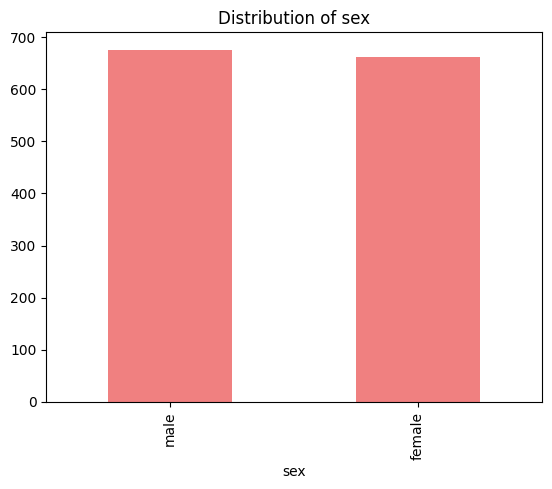


Value Counts for smoker:


,count
smoker,
no,1064
yes,274


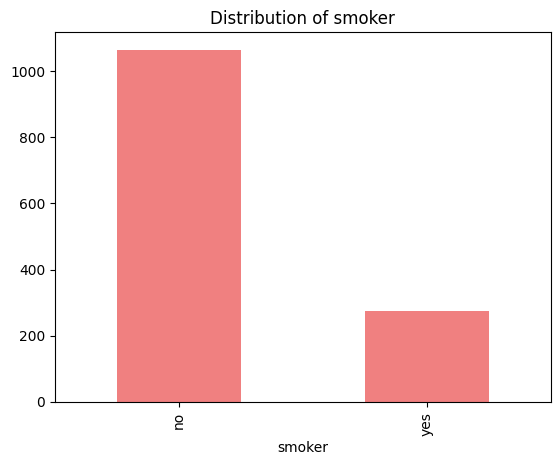


Value Counts for region:


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


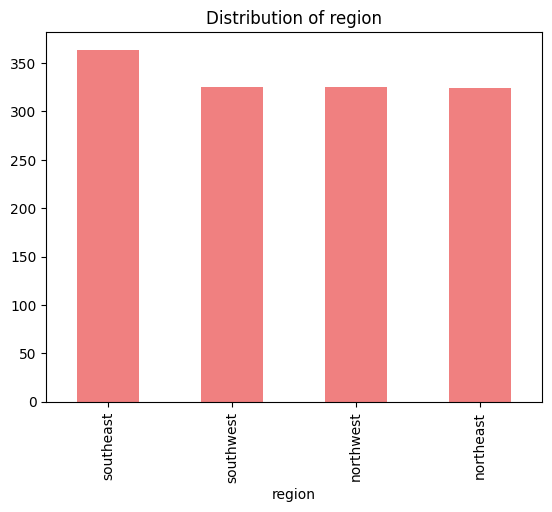

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


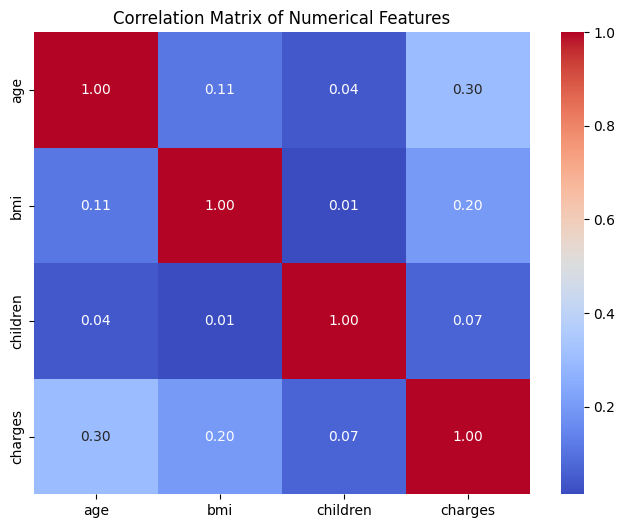

In [2]:
# Data Shape and Info
print("Data Shape:", df.shape)
display(df.info())

# Descriptive Statistics
display(df.describe())

# Missing Values
print("\nMissing Values per column:")
display(df.isnull().sum())

# Data Distribution (Numerical Features)
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Categorical Variable Exploration
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    display(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Analysis (Numerical Features)
numerical_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling potential outliers and converting categorical features into numerical representations.


**Reasoning**:
Handle outliers in the 'charges' column using winsorizing and perform one-hot encoding on categorical features.



In [3]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Winsorize 'charges'
df['charges'] = winsorize(df['charges'], limits=[0, 0.05])

# One-hot encode categorical features
categorical_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Feature engineering

### Subtask:
Engineer a new feature representing BMI categories.


**Reasoning**:
Create the 'bmi_category' column based on BMI values and then one-hot encode it, dropping the first category.



In [4]:
import pandas as pd

# Create 'bmi_category' based on BMI values
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'],
                            right=False)

# One-hot encode 'bmi_category' and drop the first category
bmi_dummies = pd.get_dummies(df['bmi_category'], drop_first=True, prefix='bmi')
df = pd.concat([df, bmi_dummies], axis=1)
df = df.drop('bmi_category', axis=1)

display(df.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_Normal,bmi_Overweight,bmi_Obese
0,19,27.900,0,16884.92400,False,True,False,False,True,False,True,False
1,18,33.770,1,1725.55230,True,False,False,True,False,False,False,True
2,28,33.000,3,4449.46200,True,False,False,True,False,False,False,True
3,33,22.705,0,21984.47061,True,False,True,False,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False,False,True,False


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using an 80/20 split and random_state=42.



In [20]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# prompt: perform Data splitting: Split the data into training and testing sets (e.g., 80/20 split or similar) to evaluate the model's performance on unseen data.

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1070, 11)
y_train shape: (1070,)
X_test shape: (268, 11)
y_test shape: (268,)


In [22]:
# prompt: perform Model training: Train a multiple linear regression model using the training data.
import numpy as np # add this line to import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.7863855226694593
Mean Squared Error: 29499226.549785536
Root Mean Squared Error: 5431.319043269833


In [23]:
# prompt: perform Model evaluation: Evaluate the model's performance on the testing set using appropriate metrics such as R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Analyze the coefficients of the model to understand the relationship between each predictor and the target variable.

from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Analyze coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
display(coefficients)


Mean Absolute Error: 4037.554332343538

Coefficients:


,Feature,Coefficient
0,age,241.631169
1,bmi,60.463133
2,children,420.793186
3,sex_male,-45.994138
4,smoker_yes,22433.975670
5,region_northwest,-496.151471
6,region_southeast,-491.075104
7,region_southwest,-820.424855
8,bmi_Normal,2621.981927
9,bmi_Overweight,3044.269760


In [24]:
# prompt: perform  Model optimization: Explore potential model improvements. This might involve feature selection or regularization techniques (e.g., LASSO or Ridge regression) to improve model performance and avoid overfitting.

from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print(f"R-squared: {r2_ridge}")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")


# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print(f"R-squared: {r2_lasso}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"Root Mean Squared Error: {rmse_lasso}")
print(f"Mean Absolute Error: {mae_lasso}")

# Feature Importance (Lasso)
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("\nLasso Regression Coefficients:")
display(lasso_coefficients)



Ridge Regression Results:
R-squared: 0.7874079116682645
Mean Squared Error: 29358039.093417138
Root Mean Squared Error: 5418.305924679516
Mean Absolute Error: 4025.646707691384

Lasso Regression Results:
R-squared: 0.7868094429329044
Mean Squared Error: 29440685.01249514
Root Mean Squared Error: 5425.927110871942
Mean Absolute Error: 4031.828812948744

Lasso Regression Coefficients:


,Feature,Coefficient
0,age,241.744349
1,bmi,63.786633
2,children,419.431525
3,sex_male,-41.995743
4,smoker_yes,22425.669009
5,region_northwest,-475.423913
6,region_southeast,-473.136992
7,region_southwest,-801.529587
8,bmi_Normal,2342.623194
9,bmi_Overweight,2748.203490


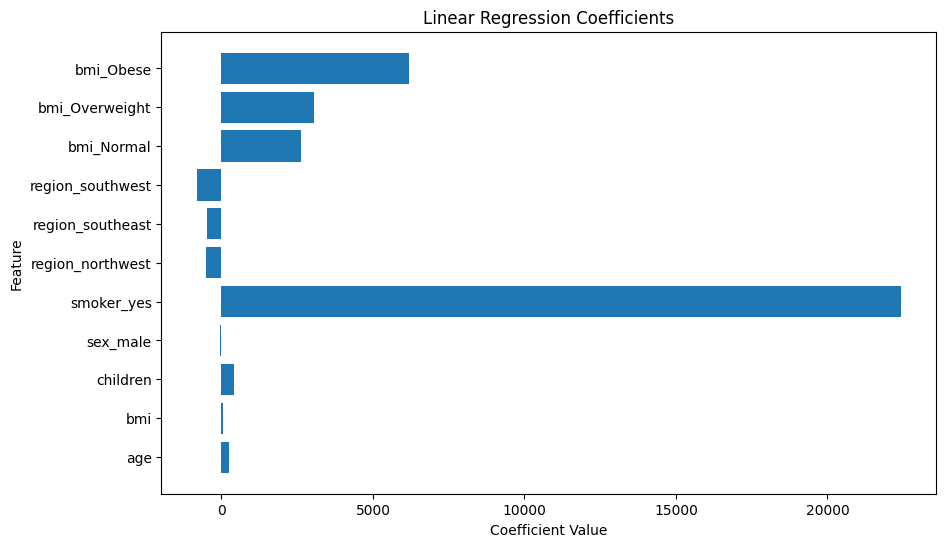

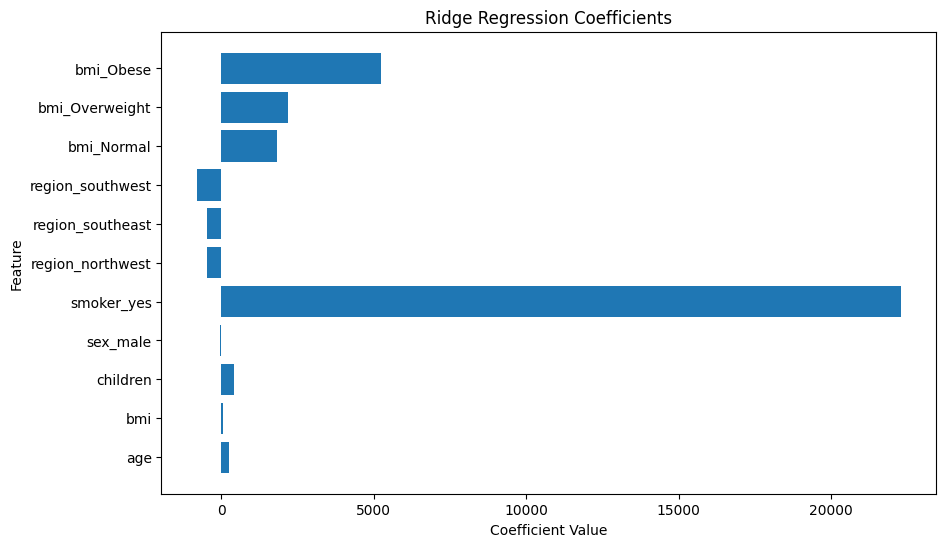

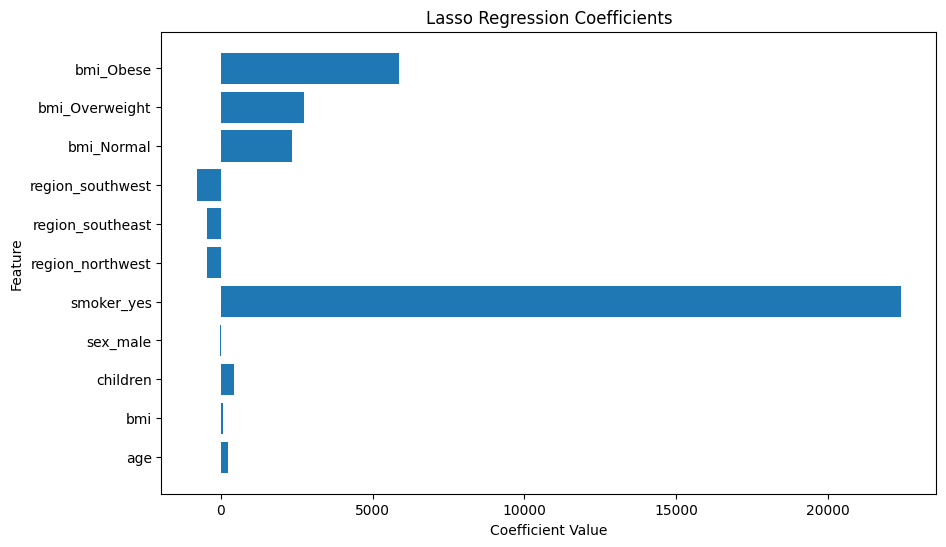

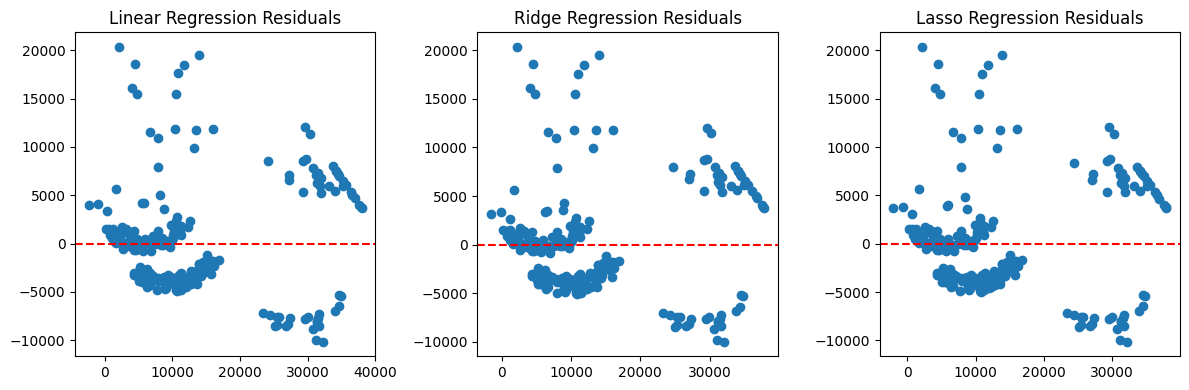

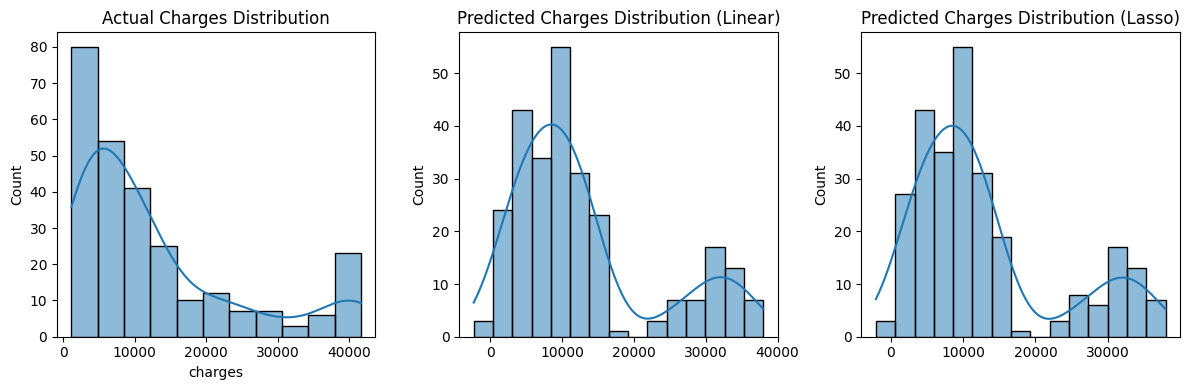

In [25]:
# prompt: perform Data visualization: Create visualizations to illustrate the relationships between variables, the model's performance (e.g., residual plots), and the distribution of key variables. Visualize the coefficients of the model.

# Visualize coefficients of the linear regression model
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()

# Visualize coefficients of the Ridge regression model
plt.figure(figsize=(10, 6))
plt.barh(X.columns, ridge_model.coef_)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Ridge Regression Coefficients")
plt.show()

# Visualize coefficients of the Lasso regression model
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Regression Coefficients")
plt.show()

# Residual plots for different models
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression Residuals')

plt.subplot(1, 3, 2)
residuals_ridge = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Ridge Regression Residuals')

plt.subplot(1, 3, 3)
residuals_lasso = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals_lasso)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Lasso Regression Residuals')

plt.tight_layout()
plt.show()

# Distribution of key variables
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(y_test, kde=True)
plt.title('Actual Charges Distribution')

plt.subplot(1, 3, 2)
sns.histplot(y_pred, kde=True)
plt.title('Predicted Charges Distribution (Linear)')

plt.subplot(1, 3, 3)
sns.histplot(y_pred_lasso, kde=True)
plt.title('Predicted Charges Distribution (Lasso)')

plt.tight_layout()
plt.show()


In [40]:
# prompt: now predict with user input

# Get user input for features
age = float(input("Enter age: "))
sex = input("Enter sex (male/female): ")
bmi = float(input("Enter bmi: "))
children = int(input("Enter number of children: "))
smoker = input("Enter smoker status (yes/no): ")
region = input("Enter region (southwest, southeast, northwest, northeast): ")

# Create a dictionary with the user's input
user_input = {
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region
}

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

# Preprocess the user input DataFrame
# One-hot encode categorical features
categorical_cols = ['sex', 'smoker', 'region']
user_df = pd.get_dummies(user_df, columns=categorical_cols, drop_first=True)

# Feature engineering (BMI category)
user_df['bmi_category'] = pd.cut(user_df['bmi'], bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'],
                            right=False)
bmi_dummies = pd.get_dummies(user_df['bmi_category'], drop_first=True, prefix='bmi')
user_df = pd.concat([user_df, bmi_dummies], axis=1)
user_df = user_df.drop('bmi_category', axis=1)

# Ensure the user input DataFrame has the same columns as the training data
missing_cols = set(X_train.columns) - set(user_df.columns)
for c in missing_cols:
    user_df[c] = 0  # Add missing columns with 0 values
user_df = user_df[X_train.columns]


# Make a prediction using the trained Lasso model
prediction = lasso_model.predict(user_df)

# Inverse transform the prediction if needed
# prediction = scaler.inverse_transform(prediction.reshape(-1, 1))

print("Predicted charges:", prediction[0])


Enter age: 26
Enter sex (male/female): male
Enter bmi: 60
Enter number of children: 0
Enter smoker status (yes/no): yes
Enter region (southwest, southeast, northwest, northeast): southwest
Predicted charges: 8729.449628875582



Summary of the entire process

1. Data Loading and Exploration:
    - Loaded the "insurance.csv" dataset.
   - Explored data shape, types, statistics, missing values, and distributions of features.
    - Analyzed correlations between numerical features, particularly focusing on 'charges'.
    - Visualized distributions of categorical features ('sex', 'smoker', 'region') and their relationships with 'charges'.

2. Data Cleaning:
    - Addressed outliers in the 'charges' column using winsorization.
    - Converted categorical features ('sex', 'smoker', 'region') into numerical representations using one-hot encoding.  

3. Feature Engineering:
    - Created a new feature, 'bmi_category', by categorizing BMI values (Underweight, Normal, Overweight, Obese).
    - One-hot encoded 'bmi_category' to create numerical representations.

4. Data Splitting:
    - Divided the dataset into training and testing sets (80/20 split) using `train_test_split`.


5. Model Training:
    - Trained three regression models:
      - Multiple Linear Regression: A standard linear regression model.
      - Ridge Regression: Linear regression with L2 regularization to prevent overfitting.
      - Lasso Regression: Linear regression with L1 regularization, which can also perform feature selection.
    - Models were trained on the preprocessed training data.

6. Model Evaluation:
    - Evaluated models using R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).
    - Compared performance metrics of the three models.
    - Analyzed the residuals (difference between actual and predicted values) of each model using residual plots and distributions to assess model fit.

7. Visualization:
    - Created visualizations of model coefficients to understand the importance of each feature in the models.
    - Visualized the distribution of actual and predicted values from the models.
    - Created plots to examine the residuals for each model.

8. Key Findings and Insights:

    - Model Performance: The models generally achieved good performance but not exceptional.  
   - Feature Importance: The coefficient plots for the different models highlighted which features contributed the most to the prediction of insurance charges, showing the influence of factors such as smoker status and bmi category.
    - Residual Analysis: The residual plots indicated some potential deviations from linear regression assumptions for certain models, suggesting areas for further analysis and improvements.  More sophisticated models or transformations of data might improve performance.


9. Limitations and Further Research:

    - Model Complexity: The models are linear regression models, so they might not capture non-linear relationships between features and the target variable.
    - Feature Engineering: More complex features might improve model performance. Exploration of feature interactions or combinations could be valuable.  For example, interactions between BMI categories, age, and smoker status could be meaningful.
   - Model Selection: The chosen regularization parameter values for Ridge and Lasso (alpha) should be tuned using techniques like cross-validation for optimal results.  
    - External Data: Additional data on the individuals (lifestyle, occupation, location) could potentially be beneficial for better predictive performance.

Overall: The analysis used linear regression and regularized linear regressions to predict insurance charges and showed the importance of certain features. There's potential for improvement by investigating more complex models, feature engineering and regularization optimization.
